In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
%matplotlib inline

In [25]:
# sample lats and lons
lats = np.arange(40, 60, 1)
lons = np.arange(-60, -40, 1)
lats = [55] * len(lats)

# Basemap

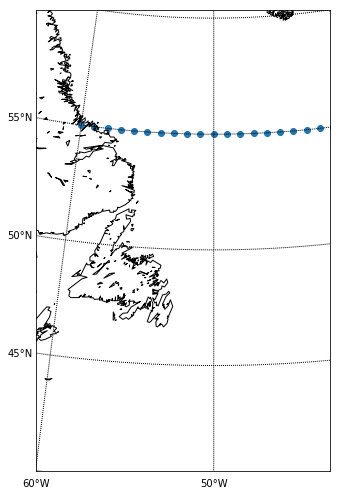

In [26]:

# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

def get_stereographic_projection(**kwargs):
    
    lon_0 = kwargs.pop('lon_0', -50)
    lat_0 = kwargs.pop('lon_0', 50)
    lat_ts = kwargs.pop('lon_0', 45)
    
    resolution = kwargs.pop('resolution', 'l')
    area_thresh = kwargs.pop('area_thresh', 0.1)
    
    llcrnrlon = kwargs.pop('llcrnrlon', -60)
    llcrnrlat = kwargs.pop('llcrnrlat', 40)
    urcrnrlon = kwargs.pop('urcrnrlon', -40)
    urcrnrlat = kwargs.pop('urcrnrlat', 60)
    
    drawcoastlines = kwargs.pop('drawcoastlines', True)
    drawstates = kwargs.pop('drawstates', False)
    drawcountries = kwargs.pop('drawcountries', False)
    
    parallels = kwargs.pop('parallels', np.arange(0, 90, 5))
    meridians = kwargs.pop('meridians', np.arange(0.,360.,10.))
    
    xtick_rotation_angle = kwargs.pop('xtick_rotation_angle', 90)

    # create polar stereographic Basemap instance
    m = Basemap(projection='stere',
                lon_0=lon_0, lat_0=lat_0, lat_ts=lat_ts,
                resolution = resolution, area_thresh=area_thresh,
                llcrnrlon = llcrnrlon,
                llcrnrlat = llcrnrlat,
                urcrnrlon = urcrnrlon,
                urcrnrlat = urcrnrlat)

    if drawcoastlines:
        m.drawcoastlines()
    if drawstates:
        m.drawstates()
    if drawcountries:
        m.drawcountries()

    # draw parallels
    parallels = parallels
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=10)

    # draw meridians
    meridians = meridians
    meridians = m.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10)
    
    if xtick_rotation_angle:
        
        # rotate x tick labels
        for meridian in meridians:

            try:
                meridians[meridian][1][0].set_rotation(xtick_rotation_angle)

            except IndexError:
                pass

    return m
    
m = get_stereographic_projection(xtick_rotation_angle=0)

# plot sample data
lons, lats = m(lons, lats)
m.scatter(lons, lats)
    
    
plt.show()

# Cartopy